<a href="https://colab.research.google.com/github/angad26/Breast-Cancer-Predictor/blob/main/Breast_Cancer_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [32]:
url = "https://raw.githubusercontent.com/angad26/Breast-Cancer-Predictor/main/Breast_cancer_data.csv"
df = pd.read_csv(url)
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [33]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


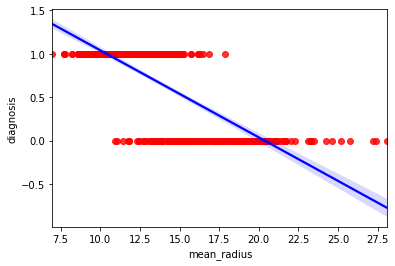

In [39]:
sns.regplot(x='mean_radius',y='diagnosis', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

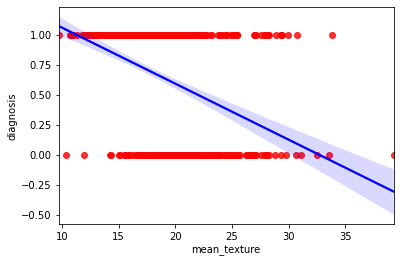

In [40]:
sns.regplot(x='mean_texture',y='diagnosis', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

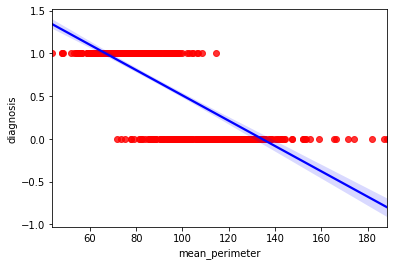

In [41]:
sns.regplot(x='mean_perimeter',y='diagnosis', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

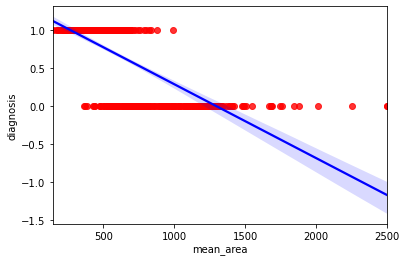

In [42]:
sns.regplot(x='mean_area',y='diagnosis', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

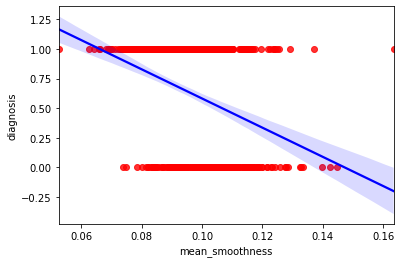

In [43]:
sns.regplot(x='mean_smoothness',y='diagnosis', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

Graphs above help us to understand the correlations between various factors and diagnosis. Hence, we can conclude here with a great level of certainity that a lower value of mean_area, mean_perimeter and mean_radious is more likely to be positively diagnosed as Breast Cancer

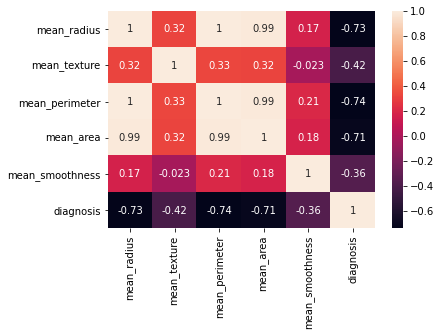

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [34]:
X = df.drop(columns='diagnosis')
Y = df['diagnosis']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_Train,Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
predictions = model.predict(X_Test)
score = accuracy_score(Y_Test, predictions)
print(score*100,'%')

94.73684210526315 %
